# 梯度下降法向量化

In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [14]:
boston = datasets.load_boston()
X = boston.data
y = boston.target


In [15]:
X.shape

(506, 13)

In [16]:
y.shape

(506,)

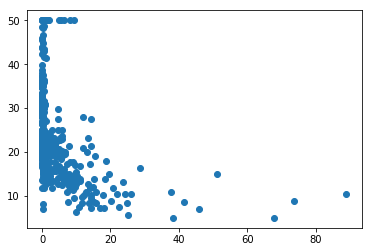

In [18]:
plt.scatter(X[:,0],y)
plt.show()

In [19]:
X = X[y <50.0]
y = y[y < 50.0]
from playML.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [21]:
from playML.LinearRegression import LinearRegression
lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train,y_train)
lin_reg1.score(X_test,y_test)

Wall time: 16.9 ms


0.8129802602658533

# 使用梯度下降法

In [22]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
D:\Machine Learning\projects\gradient-decent-simulate codes\playML\LinearRegression.py:32: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
D:\Machine Learning\projects\gradient-decent-simulate codes\playML\LinearRegression.py:48: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


LinearRegression()

In [23]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [25]:
lin_reg2.fit_gd(X_train,y_train,eta=0.000001)

LinearRegression()

In [26]:
lin_reg2.score(X_test,y_test)

0.27556634853389206

In [28]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

Wall time: 29.4 s


LinearRegression()

In [29]:
lin_reg2.score(X_test, y_test)

0.7541852353980764

# 使用梯度下降法前进行数据归一化

In [32]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)

In [33]:
X_train_standard[:10,10]

array([ 0.77931907,  0.77931907, -0.45079088,  1.15781443, -0.35616704,
       -1.25509354,  0.77931907,  1.15781443,  1.11050251,  0.77931907])

In [34]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 143 ms


LinearRegression()

In [35]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)

0.8129880620122235

# 梯度下降法的优势

In [36]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [37]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 3.73 s


LinearRegression()

In [38]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 3.8 s


LinearRegression()